# Задание 1

Исследуйте, как объем обучающей выборки и количество тестовых данных, влияет на
точность классификации в датасетах про крестики-нолики (tic_tac_toe.txt) и о спаме e-mail сообщений (spam.csv) с помощью наивного Байесовского классификатора. 

Постройте графики зависимостей точности на обучающей и тестовой выборках в зависимости от их соотношения.

### Крестики-нолики

In [3]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_precision_recall_curve

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

In [175]:
data_tic_tac = pd.read_csv('lab1_files/tic_tac_toe.csv')
data_tic_tac.columns = ['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'result']
data_tic_tac

,x1,x2,x3,x4,x5,x6,x7,x8,x9,result
0,x,x,x,x,o,o,o,x,o,positive
1,x,x,x,x,o,o,o,o,x,positive
2,x,x,x,x,o,o,o,b,b,positive
3,x,x,x,x,o,o,b,o,b,positive
4,x,x,x,x,o,o,b,b,o,positive
...,...,...,...,...,...,...,...,...,...,...
952,o,x,x,x,o,o,o,x,x,negative
953,o,x,o,x,x,o,x,o,x,negative
954,o,x,o,x,o,x,x,o,x,negative
955,o,x,o,o,x,x,x,o,x,negative


In [176]:
encoded_data = data_tic_tac.apply(LabelEncoder().fit_transform)

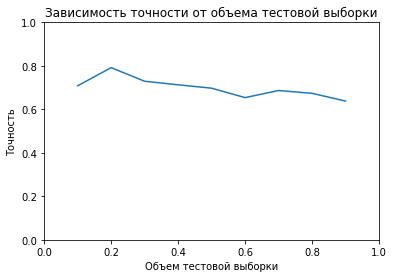

In [178]:
test_size = [i / 10 for i in range(1, 10)]
accuracy = []


for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        encoded_data.drop(['result'], axis=1), 
        encoded_data['result'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy)
plt.show()

### Спам e-mail сообщений

In [137]:
data_email = pd.read_csv('lab1_files/spam.csv')
data_email.type = data_email.type.map({'spam': 1, 'nonspam': 0})
data_email

,Unnamed: 0,make,address,all,num3d,our,over,remove,internet,order,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,1,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,2,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,3,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,5,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,4597,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,4598,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,4599,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,4600,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


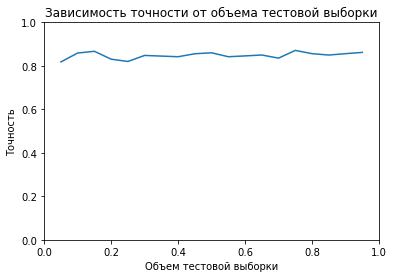

In [172]:
test_size = [i / 20 for i in range(1, 20)]
accuracy = []


for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        data_email.drop(['type'], axis=1), 
        data_email['type'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy)
plt.show()

# Задание 2

Сгенерируйте 100 точек с двумя признаками X1 и X2 в соответствии с нормальным распределением так, что одна и вторая часть точек (класс -1 и класс 1) имеют параметры: мат. ожидание X1, мат. ожидание X2, среднеквадратические отклонения для обеих переменных, соответствующие вашему варианту (указан в таблице). 

Построить диаграммы, иллюстрирующие данные. Построить Байесовский классификатор и оценить качество классификации с помощью различных методов (точность, матрица ошибок, ROС и PR-кривые). 

Является ли построенный классификатор «хорошим»?

In [259]:
# класс -1
x1_1 = np.random.normal(15, math.sqrt(3), 60) 
x2_1 = np.random.normal(9, math.sqrt(3), 60) 

# класс 1
x1_2 = np.random.normal(15, math.sqrt(5), 40)
x2_2 = np.random.normal(8, math.sqrt(5), 40)

d = {
    'x1': np.concatenate((x1_1, x1_2)),
    'x2': np.concatenate((x2_1, x2_2)),
    'class': [-1] * 50 + [1] * 50}

data = pd.DataFrame(d)
data

,x1,x2,class
0,17.484975,8.507629,-1
1,16.170192,8.521479,-1
2,16.532035,6.813593,-1
3,17.126705,6.782941,-1
4,15.989224,7.406226,-1
...,...,...,...
95,14.479744,8.688405,1
96,15.257845,9.364555,1
97,13.525996,4.860739,1
98,13.355478,7.413699,1


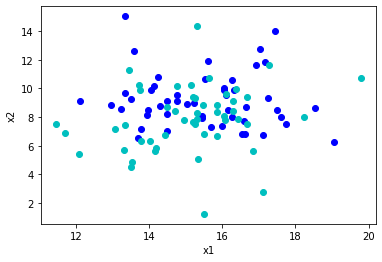

In [260]:
 fig, axes = plt.subplots()
axes.scatter(data[data['class'] == -1]['x1'],
          data[data['class'] == -1]['x2'],
          c='b')
axes.scatter(data[data['class'] == 1]['x1'],
          data[data['class'] == 1]['x2'],
          c='c')
axes.set_ylabel('x2')
axes.set_xlabel('x1')
plt.show()

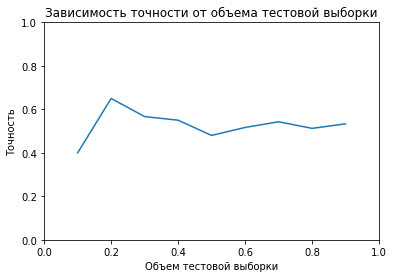

In [316]:
test_size = [i / 10 for i in range(1, 10)]
accuracy = []


for size in test_size:
    x_train, x_test, y_train, y_test = train_test_split(
        data.drop(['class'], axis=1), 
        data['class'], 
        test_size=size)
 
    model = GaussianNB()
    model.fit(x_train, y_train)

    predicted = model.predict(x_test)
    accuracy.append(accuracy_score(y_test, predicted))

plt.title("Зависимость точности от объема тестовой выборки")
axes = plt.gca()
axes.set_ylabel('Точность')
axes.set_xlabel('Объем тестовой выборки')
axes.set_xlim([0.0, 1.0])
axes.set_ylim([0.0, 1.0])
plt.plot(test_size, accuracy)
plt.show()

Точность:  0.62
Матрица ошибок: 
[[18  4]
 [15 13]]


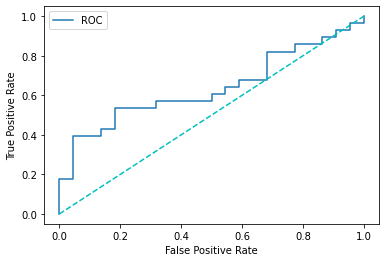

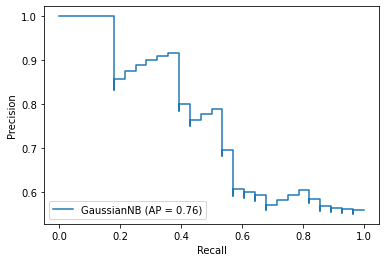

In [347]:
x_train, x_test, y_train, y_test = train_test_split(
    data.drop(['class'], axis=1), 
    data['class'], 
    test_size=0.5)

model = GaussianNB()
model.fit(x_train, y_train)

predicted = model.predict(x_test)

print('Точность: ', accuracy_score(y_test, predicted))
print('Матрица ошибок: ')
print(confusion_matrix(y_test, predicted))

probs = model.predict_proba(x_test)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

plt.plot(fpr, tpr, label='ROC')
plt.plot([0, 1], [0, 1], color='c', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

display = plot_precision_recall_curve(model, x_test, y_test)

# Задание 3

Постройте классификатор на основе метода k ближайших соседей для обучающего множества Glass (glass.csv). Посмотрите заголовки признаков и классов. Перед
построением классификатора необходимо также удалить первый признак Id number, который не несет никакой информационной нагрузки.
1. Постройте графики зависимости ошибки классификации от количества ближайших соседей.
2. Определите подходящие метрики расстояния и исследуйте, как тип метрики расстояния влияет на точность классификации.
3. Определите, к какому типу стекла относится экземпляр с характеристиками: 
   RI =1.516 Na =11.7 Mg =1.01 Al =1.19 Si =72.59 K=0.43 Ca =11.44 Ba =0.02 Fe =0.1

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [5]:
data_glass = pd.read_csv('lab1_files/glass.csv')
data_glass.drop('Id', axis=1, inplace=True)
data_glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


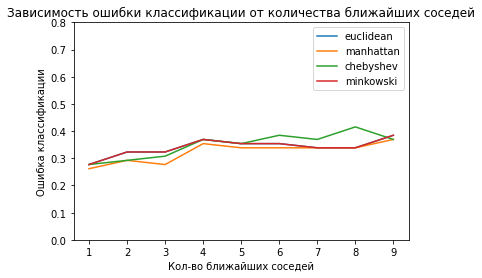

In [63]:
x_train, x_test, y_train, y_test = train_test_split(
    data_glass.drop(['Type'], axis=1), 
    data_glass['Type'], 
    test_size=0.3)

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']

for metric in metrics:
    accuracy = []
    for n in range(1, 10):
        model = KNeighborsClassifier(n_neighbors=n, metric=metric)
        model.fit(x_train, y_train)

        predicted = model.predict(x_test)
        accuracy.append(1 - accuracy_score(y_test, predicted))
    plt.plot(range(1, 10), accuracy, label=metric)
    
plt.title("Зависимость ошибки классификации от количества ближайших соседей")
axes = plt.gca()
axes.set_ylabel('Ошибка классификации')
axes.set_xlabel('Кол-во ближайших соседей')
axes.set_ylim([0.0, 0.8])
axes.legend()
plt.show()

In [67]:
x = [[1.516, 11.7, 1.01, 1.19, 72.59, 0.43, 11.44, 0.02, 0.1]]

model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')
model.fit(x_train, y_train) 

result_predict = model.predict(x)
print('Тип стекла:', result_predict[0])

Тип стекла: 5
